# 6 주차 Start

# A. Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## <font color='red'> 1.  simple random sampling

In [2]:
np.random.rand(5) # 5개의 무작위 난수
np.random.rand(5,3) # 5번 3개씩 무작위 난수

array([0.26623951, 0.23057396, 0.78351367, 0.5944673 , 0.33121716])

array([[0.81982671, 0.01836157, 0.9934665 ],
       [0.76964778, 0.30722336, 0.0259102 ],
       [0.56006593, 0.50292599, 0.24858395],
       [0.5105259 , 0.71780465, 0.14011731],
       [0.47715787, 0.24997522, 0.3231441 ]])

In [3]:
np.random.randint(10) # 0부터 5까지 무작위 정수 1개 추출
np.random.randint(1, 10, 10) # 1부터 9까지 무작위 정수 10개 추출

3

array([6, 1, 7, 3, 9, 4, 6, 7, 9, 4])

0.0029419144688948035

1.0017960385311362

(array([3.0000e+01, 5.9800e+02, 5.0190e+03, 1.9520e+04, 3.4510e+04,
        2.7734e+04, 1.0604e+04, 1.8510e+03, 1.2700e+02, 7.0000e+00]),
 array([-4.3207223 , -3.40762209, -2.49452188, -1.58142167, -0.66832146,
         0.24477875,  1.15787896,  2.07097917,  2.98407938,  3.89717959,
         4.8102798 ]),
 <BarContainer object of 10 artists>)

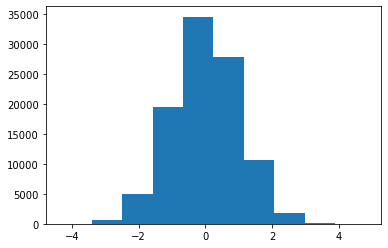

In [4]:
m = np.random.randn(100000) # 평균 0 표준편차 1 인 정규분포 무작위 10개 추출

np.mean(m)
np.std(m)
plt.hist(m)

In [5]:
np.random.randn(5, 3) # 5번 3개씩 무작위로 표준정규분포 난수

array([[-1.18388279, -0.98867873, -1.00027449],
       [-0.50896412,  1.20460991, -1.50684484],
       [ 0.34394465, -1.99014197,  0.28808898],
       [ 0.97081189,  0.03096171,  0.15036662],
       [-0.61011679, -1.004039  , -0.08861394]])

## <font color='red'> 2.  stratified random sampling

In [6]:
import pandas as pd
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
boston.shape

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(506, 13)

In [7]:
boston.RAD.value_counts(normalize=True)

24.0    0.260870
5.0     0.227273
4.0     0.217391
3.0     0.075099
6.0     0.051383
2.0     0.047431
8.0     0.047431
1.0     0.039526
7.0     0.033597
Name: RAD, dtype: float64

In [8]:
sample = boston.sample(frac=0.5, random_state=1357)
sample.RAD.value_counts(normalize=True)

24.0    0.256917
5.0     0.221344
4.0     0.221344
3.0     0.071146
6.0     0.059289
1.0     0.051383
2.0     0.047431
8.0     0.043478
7.0     0.027668
Name: RAD, dtype: float64

In [9]:
boston.sample(n=100, random_state=1357).reset_index(drop=True) # index를 0부터 순서대로 정리

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
1,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
2,8.24809,0.0,18.10,0.0,0.713,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74
3,11.57790,0.0,18.10,0.0,0.700,5.036,97.0,1.7700,24.0,666.0,20.2,396.90,25.68
4,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.79041,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98
96,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
97,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13
98,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46


In [10]:
from sklearn.model_selection import train_test_split
stratified_sample, _ = train_test_split(boston, test_size=0.2, stratify=boston['RAD'])
stratified_sample.shape

(404, 13)

<AxesSubplot:>

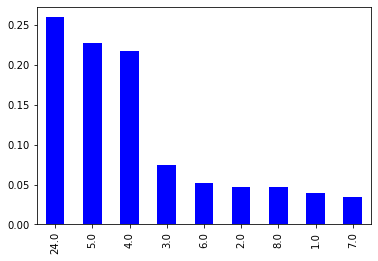

In [11]:
stratified_sample.RAD.value_counts(normalize=True).plot(kind='bar', color='blue')

<AxesSubplot:>

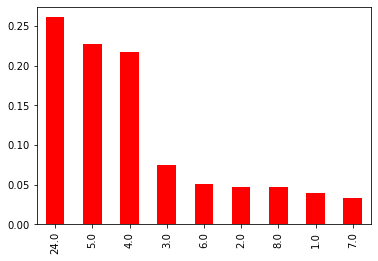

In [12]:
boston.RAD.value_counts(normalize=True).plot(kind='bar', color='red')

## <font color='red'> 3. Central limit theorem

In [13]:
import seaborn as sns

In [14]:
def show(data):
    ax = sns.distplot(data, kde=True, color='crimson',
                  hist_kws={'linewidth':25, 'alpha':1})
    ax.set(ylabel='Frequency')

In [21]:
population = np.random.binomial(10, 0.4, 10000)
population
len(population)

array([3, 4, 3, ..., 3, 4, 4])

10000

In [23]:
(int(.05*len(population)))

500

In [30]:
# 모집단 10,000에서 표본수 500개를 반복하여 복원 추출 50회 재표본 한다고 가정하면
sample_means=[]
for i in range(1,50):
    sample = np.random.choice(population, size=500, replace=False)
    sample_means.append(np.mean(sample))

In [31]:
sample_mean = np.mean(sample_means)
population_mean = np.mean(population)
print(f'Mean of Sample is {sample_mean}')
print(f'Mean of Population is {population_mean}')

Mean of Sample is 4.030897959183673
Mean of Population is 4.0086


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


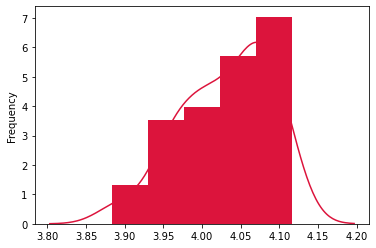

In [32]:
show(sample_means)

(array([ 1.3830621 ,  4.1491863 , 11.0644968 , 11.5255175 , 17.97980729,
        18.44082799,  9.6814347 ,  8.7593933 ,  5.5322484 ,  3.2271449 ]),
 array([3.961 , 3.9719, 3.9828, 3.9937, 4.0046, 4.0155, 4.0264, 4.0373,
        4.0482, 4.0591, 4.07  ]),
 <a list of 10 Patch objects>)

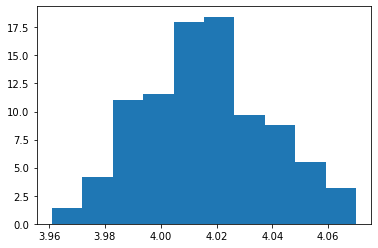

In [24]:
plt.hist(sample_means, 10, density=True)

In [29]:
population = np.random.randint(1, 1000, 10000)

In [30]:
# 표본수 3,000개에서 반복하여 복원 추출 20회 재표본
sample_means=[]
for i in range(1,4000): # 재표본수를 증가해 보면
    sample = np.random.choice(population, size=(int(.3*len(population))), replace=False)
    sample_means.append(np.mean(sample))

Mean of Sample is 502.46800525131283
Mean of Population is 502.4315


C:\Users\ances\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


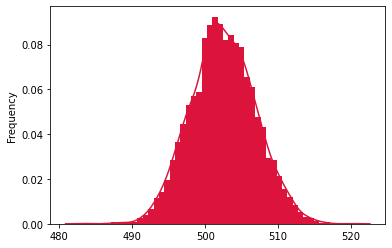

In [31]:
sample_mean = np.mean(sample_means)
population_mean = np.mean(population)
print(f'Mean of Sample is {sample_mean}')
print(f'Mean of Population is {population_mean}')

show(sample_means)

## <font color='red'> 4. Data Type

### Discrete Variable

In [25]:
np.random.randint(0,4, 100)
np.unique(np.random.randint(0,4, 100))

array([1, 2, 2, 2, 1, 2, 0, 2, 3, 2, 3, 1, 0, 0, 2, 1, 2, 3, 3, 2, 1, 0,
       3, 2, 2, 1, 1, 0, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1,
       2, 3, 3, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 3, 2, 2, 2, 3,
       2, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2, 0, 2, 2, 0,
       2, 0, 2, 1, 0, 0, 1, 3, 0, 3, 1, 1])

array([0, 1, 2, 3])

(array([25.,  0.,  0., 26.,  0.,  0., 22.,  0.,  0., 27.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

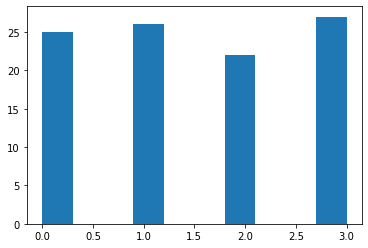

In [26]:
plt.hist(np.random.randint(0,4, 100))

In [27]:
mu = 20
sigma = 2
h = sorted(np.random.normal(mu, sigma, 100))
abs(20 - np.mean(h)) < 2

True

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 2., 1., 0.,
        3., 3., 3., 1., 1., 5., 3., 3., 0., 5., 4., 1., 4., 4., 4., 9., 2.,
        5., 4., 3., 3., 3., 4., 1., 3., 3., 2., 1., 1., 0., 2., 2., 1.]),
 array([13.24068692, 13.46712247, 13.69355802, 13.91999358, 14.14642913,
        14.37286468, 14.59930024, 14.82573579, 15.05217134, 15.2786069 ,
        15.50504245, 15.731478  , 15.95791356, 16.18434911, 16.41078467,
        16.63722022, 16.86365577, 17.09009133, 17.31652688, 17.54296243,
        17.76939799, 17.99583354, 18.22226909, 18.44870465, 18.6751402 ,
        18.90157575, 19.12801131, 19.35444686, 19.58088241, 19.80731797,
        20.03375352, 20.26018908, 20.48662463, 20.71306018, 20.93949574,
        21.16593129, 21.39236684, 21.6188024 , 21.84523795, 22.0716735 ,
        22.29810906, 22.52454461, 22.75098016, 22.97741572, 23.20385127,
        23.43028682, 23.65672238, 23.88315793, 24.10959348, 24.33602904,
        24.56246459]),
 <a list of 50 Patch 

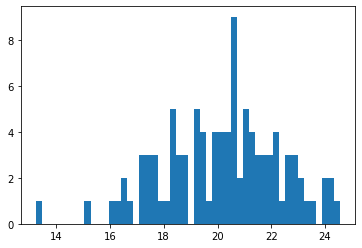

In [28]:
plt.hist(h, 50)

### Categorical data
Categorical data represent characteristics as a person's gender. maritial status, hometown

In [29]:
data = pd.DataFrame({'group':['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
                    'ounces' : [4,3,12,6,7.5,8,3,5,6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


(array([3., 0., 0., 0., 0., 3., 0., 0., 0., 3.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

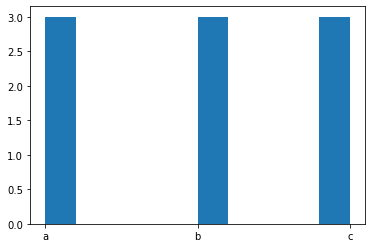

In [30]:
plt.hist(data.group)

### Nominal data
Nominal data can be seperated into discrete catogory

In [38]:
data['rating'] = np.random.randint(0,5,9)
data

,group,ounces,rating
0,a,4.0,1
1,a,3.0,3
2,a,12.0,4
3,b,6.0,1
4,b,7.5,3
5,b,8.0,0
6,c,3.0,1
7,c,5.0,0
8,c,6.0,2


In [39]:
data_pie = data.groupby('group')['ounces'].sum()
data_pie

group
a    19.0
b    21.5
c    14.0
Name: ounces, dtype: float64

([<matplotlib.patches.Wedge at 0x28e56a6fdc0>,
 [Text(0.5036221940971336, 0.9779389989221154, 'a'),
  Text(-1.1505017980955738, -0.3410947266945822, 'b'),
  Text(0.7608233961924185, -0.7944480850289933, 'c')],
 [Text(0.27470301496207283, 0.5334212721393357, '34%'),
  Text(-0.6711260488890847, -0.1989719239051729, '39%'),
  Text(0.4149945797413191, -0.43333531910672357, '25%')])

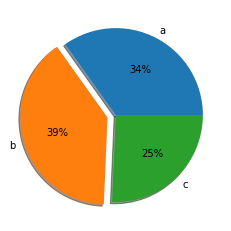

In [40]:
plt.pie(np.array(data_pie), labels=('a', 'b', 'c'), explode=(0, 0.1, 0),
       shadow=True, autopct='%d%%')

<AxesSubplot:>

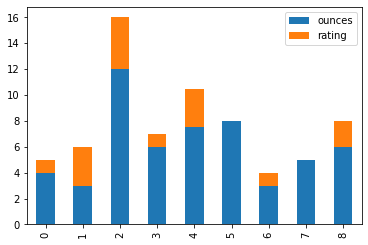

In [41]:
data.plot.bar(stacked=True)

# B.  Descriptive Statistics

## <font color='red'> 1.  Mean, mode, median

In [42]:
population = np.random.randint(10, 20, 1000)

In [43]:
np.mean(population)
np.median(population)

14.39

14.0

In [44]:
from statistics import mode
mode(population)

10

In [45]:
sample = np.random.choice(population, 30)
sample

array([16, 10, 15, 12, 11, 16, 18, 16, 17, 17, 15, 14, 18, 17, 13, 18, 14,
       10, 17, 11, 11, 10, 16, 19, 16, 14, 17, 13, 18, 18])

In [46]:
np.mean(sample)
np.median(sample)
mode(sample)

14.9

16.0

16

## <font color='red'> 2. Range, Quartile, IQR(Inter-quartile range)

In [47]:
n = np.random.rand(30)
n

array([0.80441699, 0.94479543, 0.66117087, 0.20319547, 0.62112654,
       0.12969501, 0.0952077 , 0.26600824, 0.27287064, 0.75053824,
       0.69787014, 0.45402592, 0.87569135, 0.571146  , 0.24496632,
       0.57324675, 0.71894843, 0.12641508, 0.15707904, 0.10195249,
       0.6094876 , 0.96453386, 0.80594457, 0.84279333, 0.52394618,
       0.34304428, 0.26857152, 0.3426143 , 0.77162392, 0.45265779])

In [48]:
np.max(n) - np.min(n) # range

0.8693261617575768

In [49]:
q1 = np.percentile(n, 25)
q2 = np.percentile(n, 50)
q3 = np.percentile(n, 75)
q1, q2, q3

(0.26664905829830476, 0.5475460902836652, 0.7426407836590134)

## <font color='red'> 3. Variance & Standard deviation

In [50]:
population = np.random.rand(100)
sample = np.random.choice(population, 20)

In [51]:
np.var(sample)
np.var(population)

0.08243447773845657

0.07973573645240557

In [52]:
np.std(sample)
np.std(population)

0.2871140500540797

0.2823751696810567

<font color='red'> Descriptive statistics deals with the presentation and collection of data

In [53]:
df1 = pd.DataFrame(dict(id = range(6), age = np.random.randint(18, 31, size=6)))
df1

,id,age
0,0,19
1,1,21
2,2,26
3,3,20
4,4,30
5,5,30


In [54]:
df1.age.mean()
df1['age'].mean()
df1.mean()

24.333333333333332

24.333333333333332

id      2.500000
age    24.333333
dtype: float64

<AxesSubplot:>

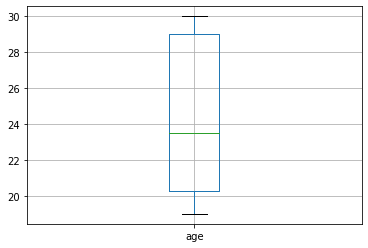

In [55]:
df1.boxplot(column='age', return_type='axes')

## Skewness, Kurtosis

In [56]:
df1['age'].skew()
df1['age'].kurt()

0.235324740450848

-2.512236871887732

### 실습
평균, 분산, 표준편차, 중앙값, 산포, 왜도, 첨도, 백분위수 구하기

In [57]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1 주차 End